In [1]:
#  Merge the In / out TAD identity with the fixed window size data
#  Filter to get only the in TAD BCs
#  Give the group number 1 to all 0 expressed BCs
#  Bin the other barcodes to 2 - 10
#  Merge the iPSC and iNeuron to plate the features
# analysis Chip seq data with a TAD window 
# HiC TAD data analysis

import pandas as pd
col_names = ["LAD_chr",
"LAD_start",
"LAD_end",
"BC_chr",
"BC_start",
"BC_end",
"_barcode",
"cDNA_D0_1_diff",
"cDNA_D0_2_diff",
"cDNA_D0_3_diff",
"cDNA_D0_4_diff",
"cDNA_D2_1_diff",
"cDNA_D2_2_diff",
"cDNA_D2_3_diff",
"cDNA_D2_4_diff",
"cDNA_D5_1_diff",
"cDNA_D5_2_diff",
"cDNA_D5_3_diff",
"cDNA_D5_4_diff",
"cDNA_SCP_A1_ips_vpr",
"cDNA_SCP_A2_ips_vpr",
"cDNA_SCP_B1_ips_vpr",
"cDNA_SCP_B2_ips_vpr",
"cDNA_SCR_A1_ips_vpr",
"cDNA_SCR_A2_ips_vpr",
"cDNA_SCR_B1_ips_vpr",
"cDNA_SCR_B2_ips_vpr",
"cDNA_VPRscp1_ineuron_vpr",
"cDNA_VPRscp2_ineuron_vpr",
"cDNA_VPRscp3_ineuron_vpr",
"cDNA_VPRscp4_ineuron_vpr",
"cDNA_VPRscr1_ineuron_vpr",
"cDNA_VPRscr2_ineuron_vpr",
"cDNA_VPRscr3_ineuron_vpr",
"cDNA_VPRscr4_ineuron_vpr",
"cDNA_WT1_ineuron_vpr",
"cDNA_WT2_ineuron_vpr",
"cDNA_WT3_ineuron_vpr",
"cDNA_WT4_ineuron_vpr",
"cDNA_WT_A_ips_vpr",
"cDNA_WT_B_ips_vpr",
"gDNA_D0_1_diff",
"gDNA_D0_2_diff",
"gDNA_D0_3_diff",
"gDNA_D0_4_diff",
"gDNA_D2_1_diff",
"gDNA_D2_2_diff",
"gDNA_D2_3_diff",
"gDNA_D2_4_diff",
"gDNA_D5_1_diff",
"gDNA_D5_2_diff",
"gDNA_D5_3_diff",
"gDNA_D5_4_diff",
"gDNA_SCP_A1_ips_vpr",
"gDNA_SCP_A2_ips_vpr",
"gDNA_SCP_B1_ips_vpr",
"gDNA_SCP_B2_ips_vpr",
"gDNA_SCR_A1_ips_vpr",
"gDNA_SCR_A2_ips_vpr",
"gDNA_SCR_B1_ips_vpr",
"gDNA_SCR_B2_ips_vpr",
"gDNA_VPRscp1_ineuron_vpr",
"gDNA_VPRscp2_ineuron_vpr",
"gDNA_VPRscp3_ineuron_vpr",
"gDNA_VPRscp4_ineuron_vpr",
"gDNA_VPRscr1_ineuron_vpr",
"gDNA_VPRscr2_ineuron_vpr",
"gDNA_VPRscr3_ineuron_vpr",
"gDNA_VPRscr4_ineuron_vpr",
"gDNA_WT1_ineuron_vpr",
"gDNA_WT2_ineuron_vpr",
"gDNA_WT3_ineuron_vpr",
"gDNA_WT4_ineuron_vpr",
"gDNA_WT_A_ips_vpr",
"gDNA_WT_B_ips_vpr",
"cDNA/gDNA ratio_D0_1_diff",
"cDNA/gDNA ratio.1_D0_2_diff",
"cDNA/gDNA ratio.2_D0_3_diff",
"cDNA/gDNA ratio.3_D0_4_diff",
"cDNA/gDNA ratio.4_D2_1_diff",
"cDNA/gDNA ratio.5_D2_2_diff",
"cDNA/gDNA ratio.6_D2_3_diff",
"cDNA/gDNA ratio.7_D2_4_diff",
"cDNA/gDNA ratio.8_D5_1_diff",
"cDNA/gDNA ratio.9_D5_2_diff",
"cDNA/gDNA ratio.10_D5_3_diff",
"cDNA/gDNA ratio.11_D5_4_diff",
"cDNA/gDNA ratio.12_SCP_A1_ips_vpr",
"cDNA/gDNA ratio.13_SCP_A2_ips_vpr",
"cDNA/gDNA ratio.14_SCP_B1_ips_vpr",
"cDNA/gDNA ratio.15_SCP_B2_ips_vpr",
"cDNA/gDNA ratio.16_SCR_A1_ips_vpr",
"cDNA/gDNA ratio.17_SCR_A2_ips_vpr",
"cDNA/gDNA ratio.18_SCR_B1_ips_vpr",
"cDNA/gDNA ratio.19_SCR_B2_ips_vpr",
"cDNA/gDNA ratio.32_WT_A_ips_vpr",
"cDNA/gDNA ratio.33_WT_B_ips_vpr",
"cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr",
"cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr",
"cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr",
"cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr",
"cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr",
"cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr",
"cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr",
"cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr",
"cDNA/gDNA ratio.28_WT1_ineuron_vpr",
"cDNA/gDNA ratio.29_WT2_ineuron_vpr",
"cDNA/gDNA ratio.30_WT3_ineuron_vpr",
"cDNA/gDNA ratio.31_WT4_ineuron_vpr",
"cutting_MspI high",
"cutting_MspI low",
"cutting_MspI mid",
"cutting_Tat1 37 high",
"cutting_Tat1 37 low",
"cutting_Tat1 37 mid",
"cutting_Tat1 65 high",
"cutting_Tat1 65 low",
"cutting_Tat1 65 mid",
"cutting_ambiguity",
"loc_chr",
"loc_location",
"sum_sum",
"_t test iPSC VPR vs SCR WT",
"_t test iNeuron VPR vs SCR WT",
"_p sig in iPSC",
"_p sig in iNeuron",
"_D5/D0",
"_Segment number",
"_In group index",
"In_or_out",
"Chip_sample",
"Chip_chr",
"Chip_start",
"Chip_end",
"Chip_peak_name",
"Chip_peak_intensity",
"peak_bed",
"Chip_p",
"Chip_q",
"peak_bed",
"Chip_summit"]

Chip_in_TAD = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/35_chip_with_TAD_boundary/03_bedtools_interesect/02_Chip_expand_LAD.bed",sep="\t", names=col_names, header=None)
Chip_barcode_TAD = Chip_in_TAD[['BC_chr', 'BC_start', 'BC_end', '_barcode', "LAD_chr","LAD_start","LAD_end","In_or_out"]].copy()
Chip_barcode_TAD = Chip_in_TAD[["BC_chr","BC_start","BC_end","_barcode", "LAD_chr","LAD_start","LAD_end","In_or_out"]].copy()
Chip_barcode_TAD = Chip_barcode_TAD.drop_duplicates(keep='first')

Chip_in_10K = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/29_endo_diff_chip_analysis/03_all_Chip_expand_corrected.csv",sep=",", header=[0,1])

import numpy as np
Chip_in_10K['peak_bed','peak_coverage'] = Chip_in_10K[('peak_bed', 'Chip_end')] - Chip_in_10K[('peak_bed', 'Chip_start')]
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = "NA"
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = np.where(Chip_in_10K[('Chip_sample', 'Chip_sample')].str.contains("iPSC"),'iPSC', Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'])
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = np.where(Chip_in_10K[('Chip_sample', 'Chip_sample')].str.contains("iNeuron"),'iNeuron', Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'])

# Merge the Chip_in_10K dataframe with the Chip_barcode_TAD dataframe
Chip_in_10K['iPSC_TAD','iPSC_TAD'] = Chip_in_10K['barcode','barcode'].map(Chip_barcode_TAD.set_index('_barcode')['In_or_out'])



/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (119,122,123,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (116,119,120,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
Chip_in_TAD.head()

,LAD_chr,LAD_start,LAD_end,BC_chr,BC_start,BC_end,_barcode,cDNA_D0_1_diff,cDNA_D0_2_diff,cDNA_D0_3_diff,...,Chip_chr,Chip_start,Chip_end,Chip_peak_name,Chip_peak_intensity,peak_bed,Chip_p,Chip_q,peak_bed.1,Chip_summit
0,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32163290,32164466,15_peak_37133,12,.,2.12981,2.63903,1.26677,NaN
1,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32162791,32164861,21_peak_36817,16,.,2.27285,3.08611,1.68105,NaN
2,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32163494,32165150,28_peak_31089,18,.,2.37092,3.34415,1.85689,NaN
3,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32164663,32166214,31_peak_52241,12,.,2.38958,2.80728,1.29286,NaN
4,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32184016,32185051,10_peak_41378,12,.,2.30785,2.56412,1.29538,NaN


In [17]:
Chip_in_10K.head()

chr      start        end            barcode      cDNA            \
    chr      start        end            barcode D0_1_diff D0_2_diff   
0  chrX  104023569  104043570  TGTTGACCATACAGTGG         4         4   
1  chrX  104023569  104043570  TGTTGACCATACAGTGG         4         4   
2  chrX  104023569  104043570  TGTTGACCATACAGTGG         4         4   
3  chrX  104023569  104043570  TGTTGACCATACAGTGG         4         4   
4  chrX  104023569  104043570  TGTTGACCATACAGTGG         4         4   

                                           ...        peak_bed  \
  D0_3_diff D0_4_diff D2_1_diff D2_2_diff  ...  Chip_peak_name   
0         2         7         3         5  ...    3_peak_35609   
1         2         7         3         5  ...    9_peak_41533   
2         2         7         3         5  ...   35_peak_39700   
3         2         7         3         5  ...   35_peak_39701   
4         2         7         3         5  ...  36_peak_106961   

                                                                         \
  Chip_peak_intensity peak_bed   Chip_p   Chip_q peak_bed.1 Chip_summit   
0                  22        .  3.13074  3.91855    2.23294         NaN   
1                  25        .  3.02870  4.16903    2.52825         NaN   
2                  10        .  2.43353  2.60126    1.03792         NaN   
3                  14        .  2.63021  3.08684    1.49034         NaN   
4                  13        .  2.42619  2.60763    1.30384         NaN   

                iPSC_iNeuron iPSC_TAD  
  peak_coverage iPSC_iNeuron iPSC_TAD  
0           200         iPSC      out  
1           305         iPSC      out  
2           459         iPSC      out  
3          1683         iPSC      out  
4           822         iPSC      out  

[5 rows x 143 columns]

In [24]:
Chip_in_10K = Chip_in_10K.droplevel(axis=1, level=0).reset_index()
Chip_in_10K.head()

,index,,chr,start,end,barcode,D0_1_diff,D0_2_diff,D0_3_diff,D0_4_diff,...,Chip_peak_name,Chip_peak_intensity,peak_bed,Chip_p,Chip_q,peak_bed.1,Chip_summit,peak_coverage,iPSC_iNeuron,iPSC_TAD
0,0,0,chrX,104023569,104043570,TGTTGACCATACAGTGG,4,4,2,7,...,3_peak_35609,22,.,3.13074,3.91855,2.23294,NaN,200,iPSC,out
1,1,1,chrX,104023569,104043570,TGTTGACCATACAGTGG,4,4,2,7,...,9_peak_41533,25,.,3.02870,4.16903,2.52825,NaN,305,iPSC,out
2,2,2,chrX,104023569,104043570,TGTTGACCATACAGTGG,4,4,2,7,...,35_peak_39700,10,.,2.43353,2.60126,1.03792,NaN,459,iPSC,out
3,3,3,chrX,104023569,104043570,TGTTGACCATACAGTGG,4,4,2,7,...,35_peak_39701,14,.,2.63021,3.08684,1.49034,NaN,1683,iPSC,out
4,4,4,chrX,104023569,104043570,TGTTGACCATACAGTGG,4,4,2,7,...,36_peak_106961,13,.,2.42619,2.60763,1.30384,NaN,822,iPSC,out


In [25]:
Chip_in_10K['Chip_sample']

0           H3K27me3_1_iPSC
1           H3K27me3_2_iPSC
2           H3K27me3_3_iPSC
3           H3K27me3_3_iPSC
4           H3K36me3_3_iPSC
5            H3K9me3_1_iPSC
6            H3K9me3_1_iPSC
7            H3K9me3_2_iPSC
8            H3K9me3_2_iPSC
9            H3K9me3_3_iPSC
10           H3K9me3_3_iPSC
11       H3K27me3_1_iNeuron
12       H3K27me3_2_iNeuron
13       H3K27me3_3_iNeuron
14        H3K9me3_1_iNeuron
15           H3K9me3_1_iPSC
16           H3K4me3_2_iPSC
17           H3K27ac_1_iPSC
18           H3K27ac_1_iPSC
19           H3K27ac_1_iPSC
20           H3K27ac_1_iPSC
21           H3K27ac_2_iPSC
22           H3K27ac_2_iPSC
23           H3K27ac_2_iPSC
24           H3K27ac_2_iPSC
25           H3K27ac_2_iPSC
26           H3K27ac_2_iPSC
27           H3K27ac_2_iPSC
28           H3K27ac_3_iPSC
29           H3K27ac_3_iPSC
                ...        
82921    H3K36me3_1_iNeuron
82922    H3K36me3_1_iNeuron
82923    H3K36me3_2_iNeuron
82924    H3K36me3_2_iNeuron
82925    H3K36me3_3_

In [43]:
# filter the individual chips for iPSC and ineuron and plot the 4 groups intensity
# iPSC , iNeuron, H3K4me3, H3K4me1, H3K27me3, H3K27ac, H3K36me3, H3K9me3

for i in ["iPSC","iNeuron"]:
    for j in ["H3K4me3", "H3K4me1", "H3K27me3", "H3K27ac", "H3K36me3", "H3K9me3"]:
        print i+","+j


iPSC,H3K4me3
iPSC,H3K4me1
iPSC,H3K27me3
iPSC,H3K27ac
iPSC,H3K36me3
iPSC,H3K9me3
iNeuron,H3K4me3
iNeuron,H3K4me1
iNeuron,H3K27me3
iNeuron,H3K27ac
iNeuron,H3K36me3
iNeuron,H3K9me3


H3K4me3


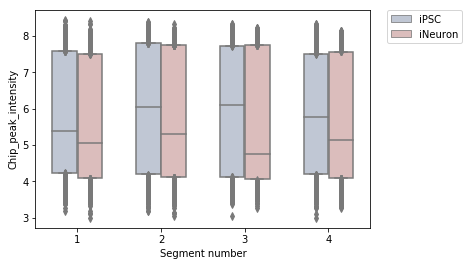

H3K4me1


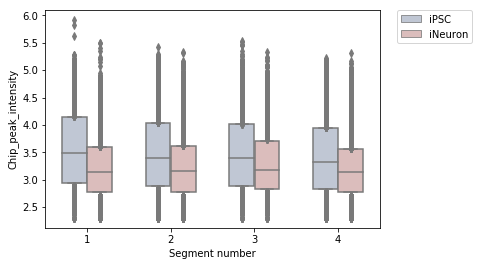

H3K27me3


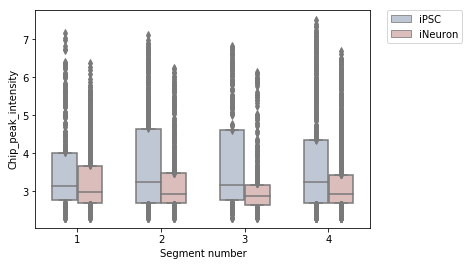

H3K27ac


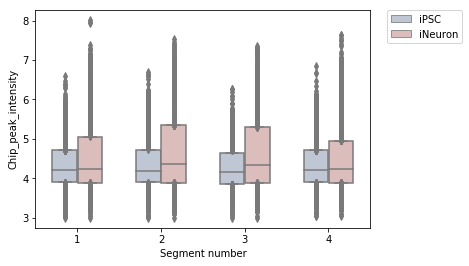

H3K36me3


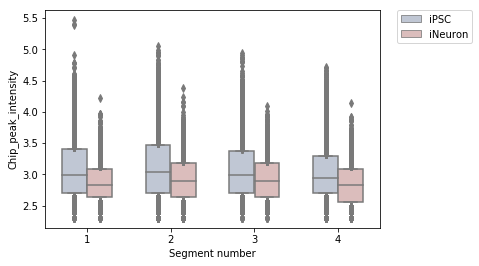

H3K9me3


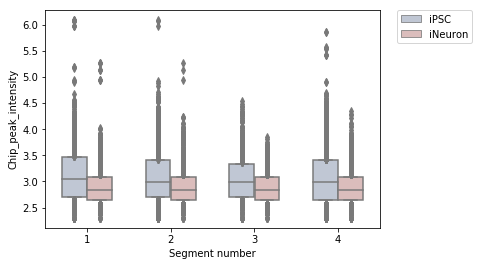

In [68]:
# filter datasets to leave only one condition as above
import seaborn as sns
import matplotlib.pyplot as plt

def plot_chip_in_group(chip_name):
    data_name = chip_name
    print(data_name)
    data_name = Chip_in_10K[Chip_in_10K['Chip_sample'].str.contains(chip_name)]
    sns.boxplot(x="Segment number", y=np.log(data_name["Chip_peak_intensity"]), data=data_name,
            whis = [25,75], width=.6, palette="vlag",hue = "iPSC_iNeuron")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


for i in ["H3K4me3", "H3K4me1", "H3K27me3", "H3K27ac", "H3K36me3", "H3K9me3"]:
    plot_chip_in_group(i)

#sns.boxplot(x="Segment number", y="Chip_peak_intensity", data=iPSC_H3K4me3,
#            whis=[0, 100], width=.6, palette="vlag")

In [54]:

iPSC_H3K4me3 = Chip_in_10K[Chip_in_10K['Chip_sample'].str.contains("H3K4me3")&Chip_in_10K['Chip_sample'].str.contains("iPSC")]
iPSC_H3K4me3.head()

,index,,chr,start,end,barcode,D0_1_diff,D0_2_diff,D0_3_diff,D0_4_diff,...,Chip_peak_name,Chip_peak_intensity,peak_bed,Chip_p,Chip_q,peak_bed.1,Chip_summit,peak_coverage,iPSC_iNeuron,iPSC_TAD
16,16,16,chr1,38975734,38995735,CTGTCACATTCAAGGAT,36,19,28,34,...,7_peak_1057,38,.,3.81129,5.55041,3.87658,37.0,253,iPSC,out
61,61,61,chr1,38975734,38995735,CTGTCACATTCAAGGAT,36,19,28,34,...,1_peak_1039,109,.,6.44058,12.78849,10.99159,367.0,750,iPSC,out
62,62,62,chr1,38975734,38995735,CTGTCACATTCAAGGAT,36,19,28,34,...,7_peak_1059,124,.,6.74691,14.19430,12.40226,352.0,552,iPSC,out
63,63,63,chr1,38975734,38995735,CTGTCACATTCAAGGAT,36,19,28,34,...,33_peak_1051,52,.,4.35161,6.99338,5.28824,76.0,250,iPSC,out
64,64,64,chr1,38975734,38995735,CTGTCACATTCAAGGAT,36,19,28,34,...,33_peak_1052,69,.,4.97327,8.69050,6.95860,346.0,505,iPSC,out


In [ ]:
# Extract all the barcodes within the TADs
Chip_in_10K_inTAD = Chip_in_10K.loc[Chip_in_10K['iPSC_TAD','iPSC_TAD'] == "in"]

# Give the non-expressed barcode group 1

Chip_in_10K_inTAD['chip_iPSC_group'] = "NA"

Chip_in_10K_inTAD['chip_iNeuron_group'] = "NA"

Chip_in_10K_inTAD['D0_median'] = Chip_in_10K_inTAD[[('cDNA/gDNA ratio', 'D0_1_diff'),
                                                    ('cDNA/gDNA ratio.1', 'D0_2_diff'),
                                                    ('cDNA/gDNA ratio.2', 'D0_3_diff'),
                                                    ('cDNA/gDNA ratio.3', 'D0_4_diff')]].median(axis=1)

Chip_in_10K_inTAD['D5_median'] = Chip_in_10K_inTAD[[('cDNA/gDNA ratio.8', 'D5_1_diff'),
                                                    ('cDNA/gDNA ratio.9', 'D5_2_diff'),
                                                    ('cDNA/gDNA ratio.10', 'D5_3_diff'),
                                                    ('cDNA/gDNA ratio.11', 'D5_4_diff')]].median(axis=1)

Chip_in_10K_inTAD['chip_iPSC_group']=np.where((Chip_in_10K_inTAD['D0_median'] == 0),1,Chip_in_10K_inTAD['chip_iPSC_group'])
Chip_in_10K_inTAD['chip_iNeuron_group']=np.where((Chip_in_10K_inTAD['D5_median'] == 0),1,Chip_in_10K_inTAD['chip_iNeuron_group'])

col_names_2 = [
"BC_chr",
"BC_start",
"BC_end",
"_barcode",
"cDNA_D0_1_diff",
"cDNA_D0_2_diff",
"cDNA_D0_3_diff",
"cDNA_D0_4_diff",
"cDNA_D2_1_diff",
"cDNA_D2_2_diff",
"cDNA_D2_3_diff",
"cDNA_D2_4_diff",
"cDNA_D5_1_diff",
"cDNA_D5_2_diff",
"cDNA_D5_3_diff",
"cDNA_D5_4_diff",
"cDNA_SCP_A1_ips_vpr",
"cDNA_SCP_A2_ips_vpr",
"cDNA_SCP_B1_ips_vpr",
"cDNA_SCP_B2_ips_vpr",
"cDNA_SCR_A1_ips_vpr",
"cDNA_SCR_A2_ips_vpr",
"cDNA_SCR_B1_ips_vpr",
"cDNA_SCR_B2_ips_vpr",
"cDNA_VPRscp1_ineuron_vpr",
"cDNA_VPRscp2_ineuron_vpr",
"cDNA_VPRscp3_ineuron_vpr",
"cDNA_VPRscp4_ineuron_vpr",
"cDNA_VPRscr1_ineuron_vpr",
"cDNA_VPRscr2_ineuron_vpr",
"cDNA_VPRscr3_ineuron_vpr",
"cDNA_VPRscr4_ineuron_vpr",
"cDNA_WT1_ineuron_vpr",
"cDNA_WT2_ineuron_vpr",
"cDNA_WT3_ineuron_vpr",
"cDNA_WT4_ineuron_vpr",
"cDNA_WT_A_ips_vpr",
"cDNA_WT_B_ips_vpr",
"gDNA_D0_1_diff",
"gDNA_D0_2_diff",
"gDNA_D0_3_diff",
"gDNA_D0_4_diff",
"gDNA_D2_1_diff",
"gDNA_D2_2_diff",
"gDNA_D2_3_diff",
"gDNA_D2_4_diff",
"gDNA_D5_1_diff",
"gDNA_D5_2_diff",
"gDNA_D5_3_diff",
"gDNA_D5_4_diff",
"gDNA_SCP_A1_ips_vpr",
"gDNA_SCP_A2_ips_vpr",
"gDNA_SCP_B1_ips_vpr",
"gDNA_SCP_B2_ips_vpr",
"gDNA_SCR_A1_ips_vpr",
"gDNA_SCR_A2_ips_vpr",
"gDNA_SCR_B1_ips_vpr",
"gDNA_SCR_B2_ips_vpr",
"gDNA_VPRscp1_ineuron_vpr",
"gDNA_VPRscp2_ineuron_vpr",
"gDNA_VPRscp3_ineuron_vpr",
"gDNA_VPRscp4_ineuron_vpr",
"gDNA_VPRscr1_ineuron_vpr",
"gDNA_VPRscr2_ineuron_vpr",
"gDNA_VPRscr3_ineuron_vpr",
"gDNA_VPRscr4_ineuron_vpr",
"gDNA_WT1_ineuron_vpr",
"gDNA_WT2_ineuron_vpr",
"gDNA_WT3_ineuron_vpr",
"gDNA_WT4_ineuron_vpr",
"gDNA_WT_A_ips_vpr",
"gDNA_WT_B_ips_vpr",
"cDNA/gDNA ratio_D0_1_diff",
"cDNA/gDNA ratio.1_D0_2_diff",
"cDNA/gDNA ratio.2_D0_3_diff",
"cDNA/gDNA ratio.3_D0_4_diff",
"cDNA/gDNA ratio.4_D2_1_diff",
"cDNA/gDNA ratio.5_D2_2_diff",
"cDNA/gDNA ratio.6_D2_3_diff",
"cDNA/gDNA ratio.7_D2_4_diff",
"cDNA/gDNA ratio.8_D5_1_diff",
"cDNA/gDNA ratio.9_D5_2_diff",
"cDNA/gDNA ratio.10_D5_3_diff",
"cDNA/gDNA ratio.11_D5_4_diff",
"cDNA/gDNA ratio.12_SCP_A1_ips_vpr",
"cDNA/gDNA ratio.13_SCP_A2_ips_vpr",
"cDNA/gDNA ratio.14_SCP_B1_ips_vpr",
"cDNA/gDNA ratio.15_SCP_B2_ips_vpr",
"cDNA/gDNA ratio.16_SCR_A1_ips_vpr",
"cDNA/gDNA ratio.17_SCR_A2_ips_vpr",
"cDNA/gDNA ratio.18_SCR_B1_ips_vpr",
"cDNA/gDNA ratio.19_SCR_B2_ips_vpr",
"cDNA/gDNA ratio.32_WT_A_ips_vpr",
"cDNA/gDNA ratio.33_WT_B_ips_vpr",
"cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr",
"cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr",
"cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr",
"cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr",
"cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr",
"cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr",
"cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr",
"cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr",
"cDNA/gDNA ratio.28_WT1_ineuron_vpr",
"cDNA/gDNA ratio.29_WT2_ineuron_vpr",
"cDNA/gDNA ratio.30_WT3_ineuron_vpr",
"cDNA/gDNA ratio.31_WT4_ineuron_vpr",
"cutting_MspI high",
"cutting_MspI low",
"cutting_MspI mid",
"cutting_Tat1 37 high",
"cutting_Tat1 37 low",
"cutting_Tat1 37 mid",
"cutting_Tat1 65 high",
"cutting_Tat1 65 low",
"cutting_Tat1 65 mid",
"cutting_ambiguity",
"loc_chr",
"loc_location",
"sum_sum",
"_t test iPSC VPR vs SCR WT",
"_t test iNeuron VPR vs SCR WT",
"_p sig in iPSC",
"_p sig in iNeuron",
"_D5/D0",
"_Segment number",
"_In group index",
'chr',
'start',
'end.1',
'Chip_sample', 
'Chip_chr',
'Chip_start',
'Chip_end',
'Chip_peak_name',
'Chip_peak_intensity',
'peak_bed',
'Chip_p',
'Chip_q',
'peak_bed.1',
'Chip_summit',
'peak_coverage',
'iPSC_iNeuron',
'iPSC_TAD',
'chip_iPSC_group', 
'chip_iNeuron_group',
'D0_median',
'D5_median']

Chip_in_10K_inTAD.columns = col_names_2

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

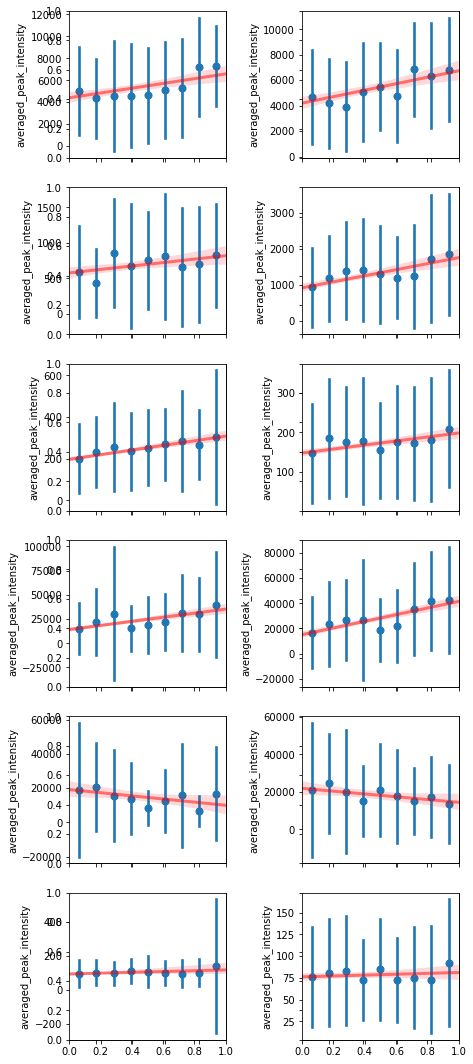

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

def chip_merged_to_figure(chip_mark,iPSC_iNeuron,D0_or_D5, sum_mean,intensity_coverage):
    chip0 = Chip_in_10K_inTAD.loc[Chip_in_10K_inTAD['Chip_sample'].str.contains(chip_mark)]
    chip0['Chip_peak_coverage'] = chip0['Chip_end'] - chip0['Chip_start']
    chip1 = chip0.loc[chip0['iPSC_iNeuron'] == iPSC_iNeuron]
    chip_plot1 = chip1[['BC_chr', 'BC_start', 'BC_end', '_barcode',
                        'D0_median','D5_median',
                        'chr','start','end.1',
                        'Chip_peak_name',
                        'Chip_peak_intensity',
                        'iPSC_iNeuron','chip_iPSC_group','chip_iNeuron_group','Chip_peak_coverage']].copy()
    chip_plot1.columns = ['chr','start','end','BC',
                          'D0_median','D5_median',
                          'chip_window_chr','chip_window_start','chip_window_end',
                          'Chip_peak_name',
                          'Chip_peak_intensity',
                          'iPSC_iNeuron','iPSC_group','iNeuron_group','Chip_peak_coverage']
    chip_plot1_zero = chip_plot1.loc[chip_plot1[iPSC_iNeuron+'_group'] == 1]
    chip_plot1_zero['averaged_peak_intensity'] = (chip_plot1_zero.groupby(['chr','start','end',
                                                                        'BC','D0_median','D5_median',
                                                                        'chip_window_chr',
                                                                        'chip_window_start',
                                                                        'chip_window_end'])[intensity_coverage].transform(sum_mean))
    chip_plot1_zero = chip_plot1_zero.drop_duplicates(['chr', 'start', 'end', 'BC', 'D0_median', 'D5_median','iPSC_iNeuron', 'averaged_peak_intensity'],keep= 'last').reset_index()
    chip_plot1_zero = chip_plot1_zero.drop(columns = ['index']).reset_index()
    chip_plot1_zero = chip_plot1_zero.drop(columns = ['index'])
    chip_plot1_zero.rename(columns = {(iPSC_iNeuron+'_group'):'group'}, inplace = True)
    chip_plot1_zero['class'] = "non-express"
    chip_plot1_zero['group'] = chip_plot1_zero['group'].astype(int)

    
    chip_plot1_nozero = chip_plot1.loc[chip_plot1[iPSC_iNeuron+'_group'] == 'NA']
    chip_plot1_nozero['averaged_peak_intensity'] = (chip_plot1_nozero.groupby(['chr','start','end',
                                                                        'BC','D0_median','D5_median',
                                                                        'chip_window_chr',
                                                                        'chip_window_start',
                                                                        'chip_window_end'])[intensity_coverage].transform(sum_mean))
    chip_plot1_nozero = chip_plot1_nozero.drop_duplicates(['chr', 'start', 'end', 'BC', 'D0_median', 'D5_median','iPSC_iNeuron', 'averaged_peak_intensity'],keep= 'last').reset_index()
    chip_plot1_nozero['rank'] = chip_plot1_nozero[D0_or_D5].rank(method='first')
    chip_plot1_nozero = chip_plot1_nozero[chip_plot1_nozero[D0_or_D5] < chip_plot1_nozero[D0_or_D5].quantile(.90)]
    chip_plot1_nozero['bin'] = pd.qcut(chip_plot1_nozero['rank'], 8, labels=["2","3","4","5","6","7","8","9"])
    chip_plot1_nozero['bin'] = chip_plot1_nozero['bin'].astype(int)
    chip_plot1_nozero['group'] = chip_plot1_nozero['bin']
    chip_plot1_nozero['class'] = "express"

    chip_plot1_all = chip_plot1_zero.append(chip_plot1_nozero)
    chip_plot1_all['group'] = chip_plot1_all['group'].astype(int)
    
    return(chip_plot1_all)
    

fig, ax = plt.subplots(nrows=6, ncols=2,
                        figsize=(7, 15),sharex=True, sharey=True)

ax1 = fig.add_subplot(6,2,1)
a = chip_merged_to_figure("H3K4me3","iPSC","D0_median","sum",'Chip_peak_intensity')
ax1 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=a)   
ax1.set_xlabel('')
ax1.set(xticklabels=[])


ax2 = fig.add_subplot(6,2,2)
# ,sharex=ax1, sharey=ax1
b = chip_merged_to_figure("H3K4me3","iNeuron","D5_median","sum",'Chip_peak_intensity')
ax2 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=b)   
ax2.set_xlabel('')
ax2.set(xticklabels=[])
# ax2.set(yticklabels=[])


ax3 = fig.add_subplot(6,2,3)
c = chip_merged_to_figure("H3K27ac","iPSC","D0_median","sum",'Chip_peak_intensity')
ax3 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=c)   
ax3.set_xlabel('')
ax3.set(xticklabels=[])


ax4 = fig.add_subplot(6,2,4)
# ,sharex=ax3, sharey=ax3
d = chip_merged_to_figure("H3K27ac","iNeuron","D5_median","sum",'Chip_peak_intensity')
ax4 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=d)   
ax4.set_xlabel('')
ax4.set(xticklabels=[])
# ax4.set(yticklabels=[])

ax5 = fig.add_subplot(6,2,5)
e = chip_merged_to_figure("H3K4me1","iPSC","D0_median","sum",'Chip_peak_intensity')
ax5 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=e)   
ax5.set_xlabel('')
ax5.set(xticklabels=[])


ax6 = fig.add_subplot(6,2,6) 
# ,sharex=ax5, sharey=ax5
f = chip_merged_to_figure("H3K4me1","iNeuron","D5_median","sum",'Chip_peak_intensity')
ax6 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=f)   
ax6.set_xlabel('')
ax6.set(xticklabels=[])
# ax6.set(yticklabels=[])

ax7 = fig.add_subplot(6,2,7)
g = chip_merged_to_figure("H3K36me3","iPSC","D0_median","sum",'Chip_peak_coverage')
ax7 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=g)   
ax7.set_xlabel('')
ax7.set(xticklabels=[])


ax8 = fig.add_subplot(6,2,8) 
# ,sharex=ax5, sharey=ax5
h = chip_merged_to_figure("H3K36me3","iNeuron","D5_median","sum",'Chip_peak_coverage')
ax8 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=h)   
ax8.set_xlabel('')
ax8.set(xticklabels=[])
# ax8.set(yticklabels=[])

ax9 = fig.add_subplot(6,2,9)
i = chip_merged_to_figure("H3K27me3","iPSC","D0_median","sum",'Chip_peak_coverage')
ax9 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=i)   
ax9.set_xlabel('')
ax9.set(xticklabels=[])


ax10 = fig.add_subplot(6,2,10) 
# ,sharex=ax5, sharey=ax5
j = chip_merged_to_figure("H3K27me3","iNeuron","D5_median","sum",'Chip_peak_coverage')
ax10 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=j)   
ax10.set_xlabel('')
ax10.set(xticklabels=[])
# ax10.set(yticklabels=[])


ax11 = fig.add_subplot(6,2,11)
k = chip_merged_to_figure("H3K9me3","iPSC","D0_median","sum",'Chip_peak_intensity')
ax11 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=k)   
ax11.set_xlabel('')
ax11.set(xticklabels=[])


ax12 = fig.add_subplot(6,2,12) 
# ,sharex=ax5, sharey=ax5
l = chip_merged_to_figure("H3K9me3","iNeuron","D5_median","sum",'Chip_peak_intensity')
ax12 = sns.regplot(x='group', y='averaged_peak_intensity', 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=l)   
ax12.set_xlabel('')
ax12.set(xticklabels=[])
# ax12.set(yticklabels=[])

fig.tight_layout()
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# plt.savefig('/Users/qw2/Desktop/chip.pdf')